In [1]:
import neattext as nt
import neattext.functions as nfx
import pandas as pd
import neattext as nt
import neattext.functions as nfx
import missingno as ms

import gradio as gr
import PIL.Image as Image
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('all_electronic_product.csv')

In [3]:
df.columns

Index(['Product_Name', 'Details', 'Price', 'Image_link', 'Discription_link',
       'Product_discription'],
      dtype='object')

In [4]:
df.dropna(inplace=True)
df.drop(columns = {'Details'}, inplace=True)

In [5]:
df = df[['Product_Name', 'Product_discription', 'Price', 'Image_link', 'Discription_link']]

In [6]:
df.columns

Index(['Product_Name', 'Product_discription', 'Price', 'Image_link',
       'Discription_link'],
      dtype='object')

In [7]:
df.shape[0]

17381

In [8]:
AA = list(map(lambda x:nt.TextFrame(x).remove_stopwords(), df.loc[:, 'Product_discription'])) 

## Removing Stopwards

In [9]:
for i in df.loc[:, 'Product_discription']:
    print(nt.TextFrame(i).remove_puncts(most_common=True).text)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Removed Punctuation

In [81]:
nfx.clean_text(df.loc[18, 'Product_discription'], 
    puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    special_char=True,
    numbers=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True)

'key specificationsoutput voltage voutput current a type din rail mount type approx wattage w features standard series greliable mechanical form enclosed warranty year warranty ip level nonwaterproof input voltage v ac featuressingle phase inputbuilt transient protector emi filterprotection short circuit overload overvoltagelow ripple noisecooling free air convectionpower ok indication terminations output set control rating details front load burn testedlow costhigh reliabilitycompacthigh efficiency long life high reliabilitylow cost year warrantyspecifications isolation input output  kvac minute input earth  kvac minute output earth  kvac minute efficiency    load nominal input voltage op voltage adjustment   nominal output voltage overload protection    rated load line load regulation better  hold time  ms rated input voltage load operating ambient  oc  rh storage ambient oc oc safety standard design refers en emc standard design refers en en approval  mark ce terminations screw type

In [82]:
PP = list(map(lambda x:nfx.clean_text(x, 
    puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    special_char=True,
    numbers=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True), df.loc[:, 'Product_discription'])) 

In [83]:
len(PP)

17381

In [84]:
df['new_product_dis'] = pd.DataFrame(PP)

In [85]:
df1 = df[['Product_Name', 'new_product_dis', 'Image_link']]

In [86]:
df1.isnull().sum()

Product_Name         0
new_product_dis    229
Image_link           0
dtype: int64

In [87]:
df1.dropna(inplace=True)

C:\Users\bp_Utkarsh Tripathi\AppData\Local\Temp\ipykernel_12492\3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [88]:
df1.isnull().sum()

Product_Name       0
new_product_dis    0
Image_link         0
dtype: int64

<Axes: >

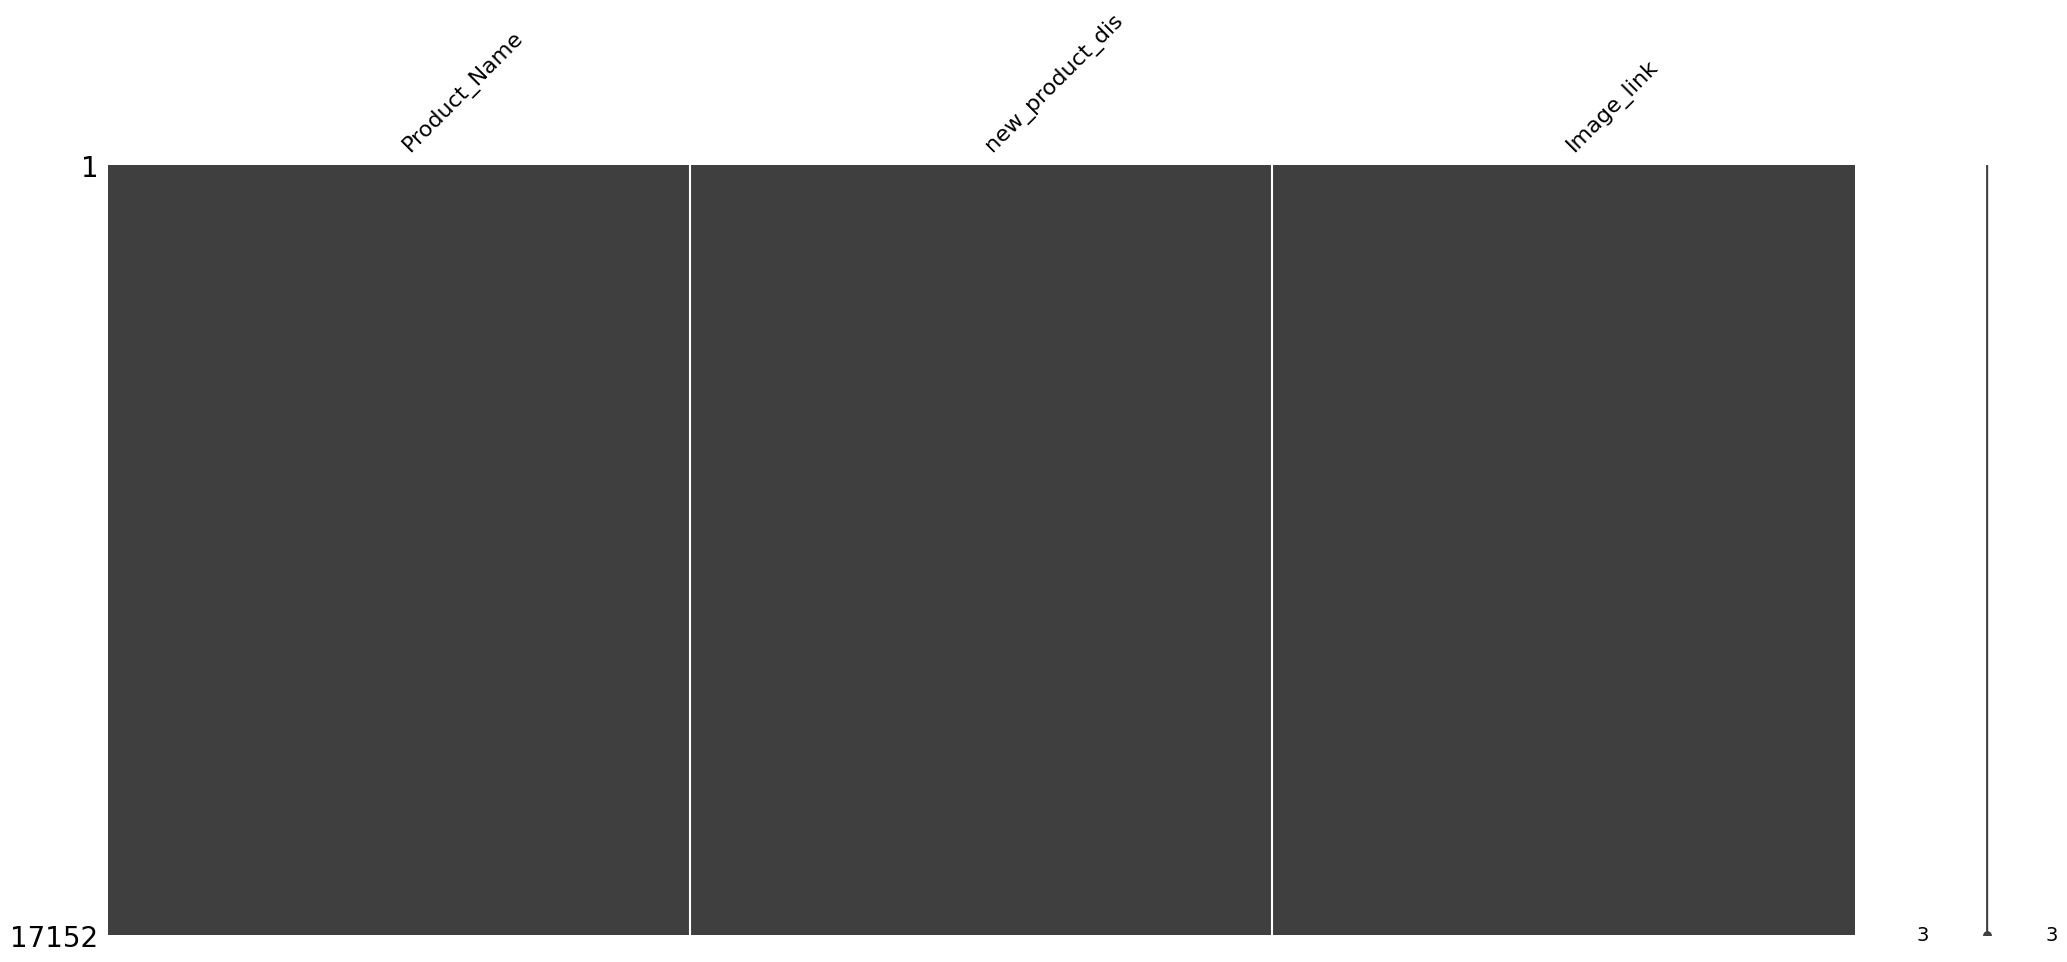

In [89]:
ms.matrix(df1)

In [90]:
df1.drop_duplicates(inplace = True)

C:\Users\bp_Utkarsh Tripathi\AppData\Local\Temp\ipykernel_12492\3087783704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace = True)


## model building

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
cv = CountVectorizer(max_features=17152, stop_words='english')

In [93]:
cv

CountVectorizer(max_features=17152, stop_words='english')

In [94]:
vector = cv.fit_transform(df1['new_product_dis'].values.astype('U')).toarray()

In [95]:
vector.shape

(16425, 17152)

In [96]:
df1.shape[0]

16425

In [97]:
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
similarity = cosine_similarity(vector)

In [99]:
similarity

array([[1.        , 1.        , 0.464364  , ..., 0.0658205 , 0.11241445,
        0.11241445],
       [1.        , 1.        , 0.464364  , ..., 0.0658205 , 0.11241445,
        0.11241445],
       [0.464364  , 0.464364  , 1.        , ..., 0.0809814 , 0.12563661,
        0.12563661],
       ...,
       [0.0658205 , 0.0658205 , 0.0809814 , ..., 1.        , 0.7245026 ,
        0.7245026 ],
       [0.11241445, 0.11241445, 0.12563661, ..., 0.7245026 , 1.        ,
        1.        ],
       [0.11241445, 0.11241445, 0.12563661, ..., 0.7245026 , 1.        ,
        1.        ]])

In [100]:
df1[df1['Product_Name'] == 'AS331 Shavison 10A Input 1x2 Way Terminal to 5A Output 6x2 Way Terminals Power Distribution Module'].index

Index([0, 5050, 7835, 13751, 14537], dtype='int64')

In [101]:
dist = sorted(list(enumerate(similarity[0])), reverse =True, key = lambda vector:vector[1])

In [102]:
sorted(list(enumerate(similarity[14537])), reverse =True, key = lambda vector:vector[1])

[(5885, 1.0000000000000002),
 (6607, 1.0000000000000002),
 (7194, 1.0000000000000002),
 (7955, 1.0000000000000002),
 (14537, 1.0000000000000002),
 (5883, 0.995579502714081),
 (6605, 0.995579502714081),
 (7192, 0.995579502714081),
 (7953, 0.995579502714081),
 (14535, 0.995579502714081),
 (5884, 0.9933038894465291),
 (5886, 0.9933038894465291),
 (6606, 0.9933038894465291),
 (6608, 0.9933038894465291),
 (7193, 0.9933038894465291),
 (7195, 0.9933038894465291),
 (7954, 0.9933038894465291),
 (7956, 0.9933038894465291),
 (14536, 0.9933038894465291),
 (14538, 0.9933038894465291),
 (5873, 0.7164877534575879),
 (6595, 0.7164877534575879),
 (7182, 0.7164877534575879),
 (7943, 0.7164877534575879),
 (14525, 0.7164877534575879),
 (5870, 0.7148578294869963),
 (6592, 0.7148578294869963),
 (7179, 0.7148578294869963),
 (7940, 0.7148578294869963),
 (14522, 0.7148578294869963),
 (5888, 0.7124010622782153),
 (6610, 0.7124010622782153),
 (7197, 0.7124010622782153),
 (7958, 0.7124010622782153),
 (14540, 0.71

In [103]:
df1.columns

Index(['Product_Name', 'new_product_dis', 'Image_link'], dtype='object')

In [104]:
for i in dist[:500]:
    print(df1.iloc[i[0]].Product_Name, '\n' , df1.iloc[i[0]].Image_link, '\n\n\n')

AS331 Shavison 10A Input 1x2 Way Terminal to 5A Output 6x2 Way Terminals Power Distribution Module 
 https://www.electronicscomp.com/image/cache/catalog/as331-shavison-power-distribution-module-228x228.jpg 



AS333 Shavison 20A Input 2x2 Way Terminal to 5A Output 12x2 Way Terminals Power Distribution Module 
 https://www.electronicscomp.com/image/cache/catalog/as333-shavison-power-distribution-module-228x228.jpg 



AS362-24V-OE Shavison 2 Channel 24V Solid State Relay Module 230V 5A with Reverse Blocking Diode and Led Indicator 
 https://www.electronicscomp.com/image/cache/catalog/as362-24v-oe-shavison-relay-module-228x228.jpg 



4PIN (Large) IDE 1 Input to 7 SATA Output Hard Disk Power Cord 
 https://www.electronicscomp.com/image/cache/catalog/4pin-large-ide-1-input-to-7-sata-output-hard-disk-power-cord-228x228.jpg 



4PIN (Large) IDE 1 Input to 8 SATA Output Hard Disk Power Cord 
 https://www.electronicscomp.com/image/cache/catalog/4pin-large-ide-1-input-to-8-sata-output-hard-dis

In [33]:
1214zwef

SyntaxError: invalid decimal literal (2038133877.py, line 1)

In [105]:
def recommand(item):
    index = df1[df1['Product_Name']== item].index[0]
    dist = sorted(list(enumerate(similarity[index])), reverse =True, key = lambda vector:vector[1])
    for i in dist[:5]:
        print(df1.iloc[i[0]].Product_Name, '\n' , show_image(df1.iloc[i[0]].Image_link), '\n\n\n\n')

In [ ]:
def recommand(item):
    index = df1[df1['Product_Name']== item].index[0]
    dist = sorted(list(enumerate(similarity[index])), reverse =True, key = lambda vector:vector[1])
    for i in dist[:200]:
        response = requests.get(df1.iloc[i[0]].Image_link)
        img = Image.open(BytesIO(response.content))
        plt.figure(figsize=(2,2)) # Adjust this value to set the figure size
        plt.imshow(img)
        plt.axis('off')
        plt.show()



# item = "M5 STACK ATOM 2D/1D Barcode Scanner Kit"
# recommand(item)

In [107]:
import gradio as gr
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


def recommend_images(item):
    index = df1[df1['Product_Name'] == item].index[0]
    dist = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector: vector[1])

    image_urls = []
    for i in dist[:999]:
        image_urls.append(df1.iloc[i[0]].Image_link)

    return image_urls

# Gradio UI
iface = gr.Interface(
    fn=recommend_images,
    inputs="text",
    outputs=gr.Gallery(
        label="Recommended Images",
        show_label=False,
        elem_id="gallery",
        columns=[5],  # Adjust the number of columns as needed
        rows=[4],
        object_fit="contain",
        height="auto"
    )
)

if __name__ == "__main__":
    iface.launch()


Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


In [109]:
for i, j in enumerate(df1.Product_Name):
    print(i, "---> ", j)

0 --->  AS331 Shavison 10A Input 1x2 Way Terminal to 5A Output 6x2 Way Terminals Power Distribution Module
1 --->  AS333 Shavison 20A Input 2x2 Way Terminal to 5A Output 12x2 Way Terminals Power Distribution Module
2 --->  AS348-113 Shavison SMPS - 12V 2A - 24W Open Frame Power Supply
3 --->  AS348-115 Shavison SMPS - 24V 1A - 24W Open Frame Power Supply
4 --->  AS361-24V-OE Shavison 1 Channel 24V Solid State Relay Module 230V 5A with Reverse Blocking Diode and Led Indicator
5 --->  AS361-24V-S-OE Shavison 1 Channel 24V Din Rail/Socket Mounted Solid State Relay Module 230V 5A with Reverse Blocking Diode and Led Indicator
6 --->  AS362-24V-OE Shavison 2 Channel 24V Solid State Relay Module 230V 5A with Reverse Blocking Diode and Led Indicator
7 --->  AS333 Shavison 20A Input 2x2 Way Terminal to 5A Output 12x2 Way Terminals Power Distribution Module
8 --->  AS348-113 Shavison SMPS - 12V 2A - 24W Open Frame Power Supply
9 --->  AS348-115 Shavison SMPS - 24V 1A - 24W Open Frame Power Suppl

Traceback (most recent call last):
  File "C:\Users\bp_Utkarsh Tripathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bp_Utkarsh Tripathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bp_Utkarsh Tripathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bp_Utkarsh Tripathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

Error while flagging: [Errno 22] Invalid argument: 'https://www.electronicscomp.com/image/cache/catalog/safeconnect-twisted-30cm-22awg-servo-lead-jr-extension-cable-with-hook--1pcs-228x228.jpg'


In [ ]:
3xsxdcds88

## Do Experiment on Below code only



def show_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(5,5)) # Adjust this value to set the figure size
    plt.imshow(img)
    plt.axis('off')
    plt.show()


for i in dist[:5]:
    response = requests.get(df1.iloc[i[0]].Image_link)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(5,5)) # Adjust this value to set the figure size
    plt.imshow(img)
    plt.axis('off')
    plt.show()



def recommand(item):
    index = df1[df1['Product_Name']== item].index[0]
    dist = sorted(list(enumerate(similarity[index])), reverse =True, key = lambda vector:vector[1])
    for i in dist[:5]:
        response = requests.get(df1.iloc[i[0]].Image_link)
        img = Image.open(BytesIO(response.content))
        plt.figure(figsize=(5,5)) # Adjust this value to set the figure size
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [ ]:
for i, z in enumerate(df1.Product_Name):
    print( z , "-----> ", i)


In [ ]:
# [df1.iloc[i[0]].Image_link for i in dist[:200]]

In [ ]:
# def recommand(item):
#     index = df1[df1['Product_Name']== item].index[0]
#     dist = sorted(list(enumerate(similarity[index])), reverse =True, key = lambda vector:vector[1])
#     for i in dist[:4]:
#         response = requests.get(df1.iloc[i[0]].Image_link)
#         img = Image.open(BytesIO(response.content))
#         plt.figure(figsize=(2,2)) # Adjust this value to set the figure size
#         plt.imshow(img)
#         plt.axis('off')
#         plt.show()



# item = "BNC Female For Cable Straight RF Connector Locking Wire"
# recommand(item)

In [124]:
def recommend(item):
    index = df1[df1['Product_Name'] == item].index[0]
    dist = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector: vector[1])

    images = []
    for i in dist[:40]:
        response = requests.get(df1.iloc[i[0]].Image_link)
        img = Image.open(BytesIO(response.content))
        images.append(img)

    # Display all images in a gallery
    plt.figure(figsize=(12, 12))  # Adjust this value to set the figure size
    for i, img in enumerate(images, 1):
        plt.subplot(9, 3, i)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# <!-- # item = "BNC Female For Cable Straight RF Connector Locking Wire"
# recommend(item) -->


Value error


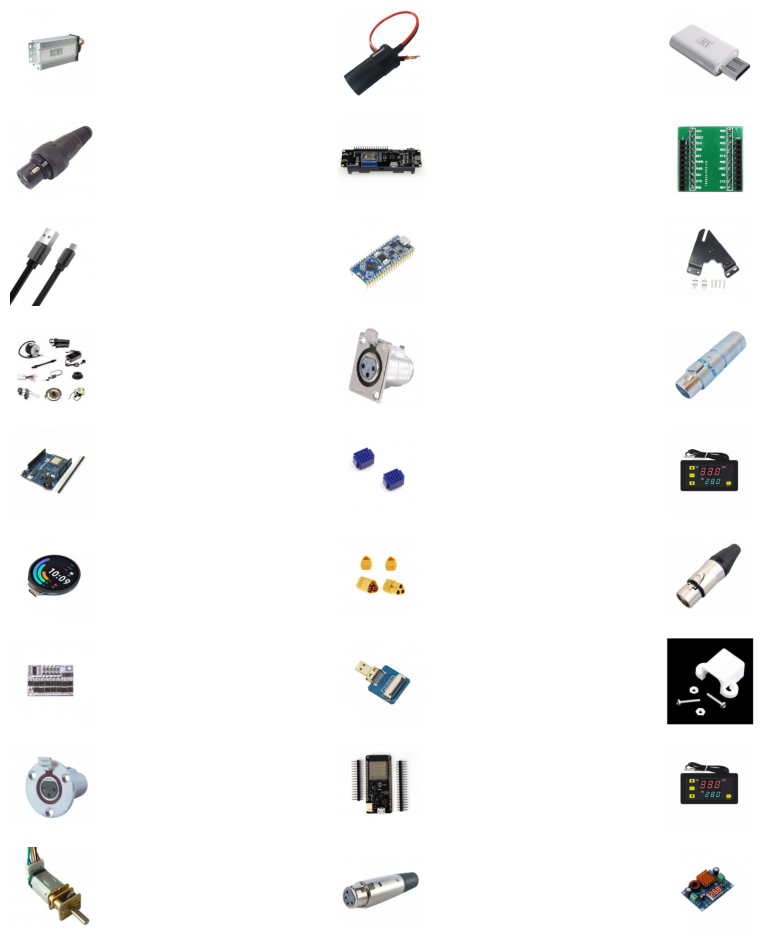

In [125]:
try:
    
    item = "Robotbit IOBIT V2.0 Micro:bit Expansion Board"
    recommend(item)


except ValueError:
    print("Value error")
    

In [ ]:
# This demo needs to be run from the repo folder.
# python demo/fake_gan/run.py
import random

import gradio as gr


def fake_gan(l):
    images = [(random.choice([df1.iloc[i[0]].Image_link for i in list[:400]]), f"label {i}") for i in range(400) ]
    return images


with gr.Blocks() as demo:
    gallery = gr.Gallery(
        label="Generated images", 
        show_label=False, 
        elem_id="gallery", 
        columns=[6], 
        rows=[7], 
        object_fit="contain", 
        height="auto")
    
    btn = gr.Button("Generate images", scale=0)

    btn.click(fake_gan, None, gallery)

if __name__ == "__main__":
    demo.launch()



In [ ]:
uxs"

In [46]:
len(dist)

16766

In [52]:
for i, j in enumerate(df1.Product_Name):
    print(i, "----> ", j) 
    

0 ---->  AS331 Shavison 10A Input 1x2 Way Terminal to 5A Output 6x2 Way Terminals Power Distribution Module
1 ---->  AS333 Shavison 20A Input 2x2 Way Terminal to 5A Output 12x2 Way Terminals Power Distribution Module
2 ---->  AS348-113 Shavison SMPS - 12V 2A - 24W Open Frame Power Supply
3 ---->  AS348-115 Shavison SMPS - 24V 1A - 24W Open Frame Power Supply
4 ---->  AS361-24V-OE Shavison 1 Channel 24V Solid State Relay Module 230V 5A with Reverse Blocking Diode and Led Indicator
5 ---->  AS361-24V-S-OE Shavison 1 Channel 24V Din Rail/Socket Mounted Solid State Relay Module 230V 5A with Reverse Blocking Diode and Led Indicator
6 ---->  AS362-24V-OE Shavison 2 Channel 24V Solid State Relay Module 230V 5A with Reverse Blocking Diode and Led Indicator
7 ---->  AS331 Shavison 10A Input 1x2 Way Terminal to 5A Output 6x2 Way Terminals Power Distribution Module
8 ---->  AS333 Shavison 20A Input 2x2 Way Terminal to 5A Output 12x2 Way Terminals Power Distribution Module
9 ---->  AS348-113 Shavi

In [73]:
df1[df1['Product_Name'] == "N20 12V 400 Rpm Micro Metal Gear Motor"].index[3]

16629

In [53]:
def recommend_images(item):
    index = df1[df1['Product_Name'] == item].index[0]
    dist = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector: vector[1])

    image_urls = []
    for i in dist[:999]:
        image_urls.append(df1.iloc[i[0]].Image_link)

    return image_urls

item = 'recommend_images'
recommend_images(item)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [51]:
import gradio as gr
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


def recommend_images(item):
    index = df1[df1['Product_Name'] == item].index[0]
    dist = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector: vector[1])

    image_urls = []
    for i in dist[:999]:
        image_urls.append(df1.iloc[i[0]].Image_link)

    return image_urls

# Gradio UI
iface = gr.Interface(
    fn=recommend_images,
    inputs="text",
    outputs=gr.Gallery(
        label="Recommended Images",
        show_label=False,
        elem_id="gallery",
        columns=[5],  # Adjust the number of columns as needed
        rows=[4],
        object_fit="contain",
        height="auto"
    )
)

if __name__ == "__main__":
    iface.launch()


Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\bp_Utkarsh Tripathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bp_Utkarsh Tripathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bp_Utkarsh Tripathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1522, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bp_Utkarsh Tripathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\